# Hypothesis-Testing_Sprint5_Part1

#### - Ex 1
Download the attached UEFA official dataset and select an attribute from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha. 



#### - Ex 2
With the same dataset, select two other attributes of the dataset. Calculate the p-values ​​and say if they reject the null hypothesis by taking a 5% alpha.



#### - Ex 3
Continue with the attached dataset and select three attributes from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

In [10]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import scipy
from scipy import stats
import math

#### Let upload and study the dataset.

In [11]:
#read dataframe
df = pd.read_csv('Lligues_europees_UEFA.csv',encoding="ISO-8859-1", sep=';')
#display full (non-truncated) dataframe information in Pandas dataframe
pd.set_option('display.max_colwidth', None)
df.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


Items: Rk;Squad;Country;LgRk;MP;W;D;L;GF;GA;GD;Pts;Pts/G;xG;xGA;xGD;xGD/90;Last 5;Attendance;Top Team Scorer;Goalkeeper

1º (Rk) item correspond to the ranking correspond to the index.

2º (Squad) item is the team (soccher club name).

3º (Country) item is the country.

4º (LgRk)

5º (MP) item is the number of matches.

6º (W) item is the number of won matches.

7º (D) item is the number of drawn matches.

8º (L) item is the number of lose matches.

9º (GF) item represents the number of goals for.

10º (GA) item represents the number of goals against.

11º (GD) item represents the result from the number of goals for minus the number of goals against.

12º (Pts) item represents the points.

13º (Pts/G) item represents the points relationated to the goals for.

14º (xG) item represents expected goals for.

15º (xGA) item represents expected goals against.

16º (xGD) item represents expected result from the number of goals for minus the number of goals against.

17º (xGD/90)

18º (Last 5)

19º (Attendance) item represents the number of attendance.

20º (Top team soccer) item represents top performer of the team.

21º (Goalkeeper) item represents the player with the higher number of goals.

 reference: https://understat.com/league/La_liga

#### Preprocessing and clean database.

In [12]:
pd.set_option('display.max_colwidth', None)
df

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


In [13]:
#delete the first columns whe finished to use
df = df.drop(["1column"], axis = 1)
df

KeyError: "['1column'] not found in axis"

In [ ]:
#drop the first row
df = df.iloc[1: , :]
# display all the  rows
pd.set_option('display.max_rows', None)

# display all the  columns
pd.set_option('display.max_columns', None)

df

In [ ]:
display(df.info())

In [14]:
# get a random sample
df_sample = df.sample(frac=0.20) #(n=20)

df_sample

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
15,16,Marseille,FRA,3,37,20,8,9,59,38,...,68,1.84,56.6,39.2,17.4,0.47,W W L W L,51082,Dimitri Payet - 12,Pau López
82,83,Leeds United,ENG,17,37,8,11,18,40,78,...,35,0.95,45.8,69.1,-23.4,-0.63,D L L L D,36308,Raphael Dias Belloli - 10,Illan Meslier
17,18,Arsenal,ENG,5,36,21,3,12,56,45,...,66,1.83,56.3,44.0,12.2,0.34,W W W W L,59636,Bukayo Saka - 11,Aaron Ramsdale
77,78,Spezia,ITA,15,37,10,6,21,41,68,...,36,0.97,37.3,66.6,-29.3,-0.79,L L L L W,6380,Daniele Verde - 8,Ivan Provedel
67,68,Southampton,ENG,15,36,9,13,14,41,61,...,40,1.11,45.6,54.7,-9.1,-0.25,W L D L L,30053,James Ward-Prowse - 9,Fraser Forster
78,79,Mallorca,ESP,17,37,9,9,19,34,63,...,36,0.97,38.7,47.5,-8.9,-0.24,W L L D W,12712,Vedat Muriqi Salva Sevilla - 5,Manolo Reina
90,91,Arminia,GER,17,34,5,13,16,27,53,...,28,0.82,28.2,62.3,-34.1,-1.00,L L D L D,16773,Masaya Okugawa - 8,Stefan Ortega
24,25,Nice,FRA,6,37,19,7,11,49,34,...,63,1.70,55.1,44.4,10.6,0.29,L W W W L,15478,Andy Delort - 13,Walter Benítez
69,70,Elche,ESP,15,37,10,9,18,37,51,...,39,1.05,32.3,59.8,-27.5,-0.74,W D L L L,15546,Pere Milla - 8,Édgar Badía
37,38,Athletic Club,ESP,8,37,14,13,10,43,35,...,55,1.49,49.3,36.9,12.4,0.33,W W D L W,32949,Iñaki Williams - 8,Unai Simón


#### Let start the hypotesis tests:

Null hypothesis: 

H0 : P = x

alternative hypothesis

Ha : P /= x

Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

In [15]:
df_sample.dtypes

Rk                   int64
Squad               object
Country             object
LgRk                 int64
MP                   int64
W                    int64
D                    int64
L                    int64
GF                   int64
GA                   int64
GD                   int64
Pts                  int64
Pts/G              float64
xG                 float64
xGA                float64
xGD                float64
xGD/90             float64
Last 5              object
Attendance           int64
Top Team Scorer     object
Goalkeeper          object
dtype: object

Let cast the variables I selected from object type to int and float types.

In [17]:
df_sample['MP']=df_sample['MP'].astype(int)
df_sample['W']=df_sample['W'].astype(int)
df_sample['D']=df_sample['D'].astype(int)
df_sample['L']=df_sample['L'].astype(int)
df_sample['GF']=df_sample['GF'].astype(int)
df_sample['GA']=df_sample['GA'].astype(int)
df_sample['GD']=df_sample['GD'].astype(int)
df_sample['Pts']=df_sample['Pts'].astype(int)
df_sample['Pts/G']=df_sample['Pts/G'].astype(float)
df_sample['xGD/90']=df_sample['xGD/90'].astype(float)
df_sample['Attendance']=df_sample['Attendance'].astype(int)

#### 1. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

Interpretation

H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.

I will show two different ways to veryfy the hipotesís of the distribution type of the data:

In [18]:
data = [df_sample['GF']]

In [19]:
#1º example
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.802, p=0.001
Probably not Gaussian


In [20]:
#2º example
# create a function that checks if the distribution is normal: 
def checkDistribution(data): 
    stat, p_value_norm = shapiro(data)
    
    print('stat=%.3f, p=%.3f' % (stat, p_value_norm))
    
    if p_value_norm > 0.05 : 
        print("Probably normally distributed")
    else: 
        print("Probably not normally distributed")

In [21]:
checkDistribution(df_sample['GF'])

stat=0.802, p=0.001
Probably not normally distributed


Cheking the distribution of the selected variable:

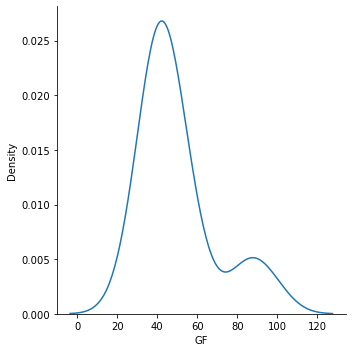

In [22]:
sns.displot(df_sample, x="GF", kind="kde")


2. Calculate the p-values ​​and say if they reject the null hypothesis by taking a 5% alpha.

Cheking the correlation between the selected two variables:

H0: There is a dependency between the variables.
H1: The two variables are independent.

In [24]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
data1 = [df_sample['W']]
data2 = [df_sample['GF']]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
	print('Probably dependent')
else:
	print('Probably independent')

stat=0.663, p=0.000
Probably dependent


THe result of our test confirm the null hypothesis. It exists correlation beetween the two selected variables.

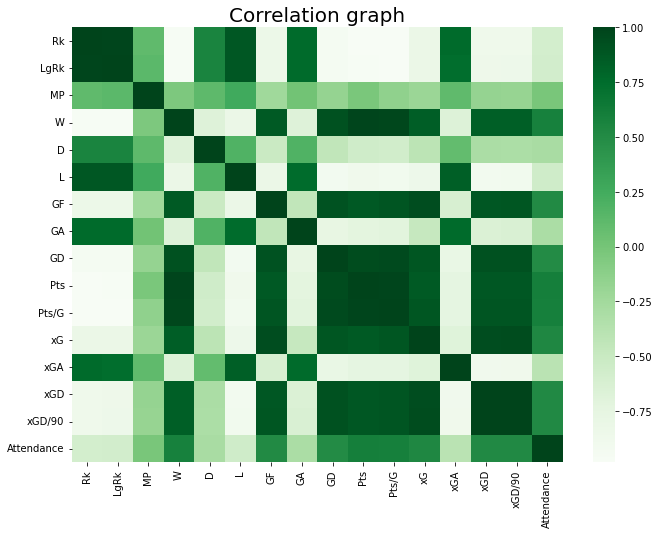

In [25]:
corr = df_sample.corr()
plt.figure(figsize=(11,8))
plt.title('Correlation graph', fontsize=20)
sns.heatmap(corr, cmap="Greens")
plt.show()

#### 3. Continue with the attached dataset and select three attributes from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.

#### Let display a small brief of the dataset visualizing the Soccer Clubs per Country.

In [26]:
y = df.Country.value_counts()

labels = y.index

In [27]:
#explode will make some wedge in our chart. 

explode = [i/24 for i in range(3,len(y)+3)]
for x in explode[0:17]:
    explode[explode.index(x)]=0   #using just the last 3 elements
explode[-1] = 1.2   

In [28]:
#here will define map of colors for our plotp

normdata = mpl.colors.Normalize(min(y), max(y))  
colormap = mpl.cm.Greens #this line allows us to change the colors
colors =colormap(normdata(y))

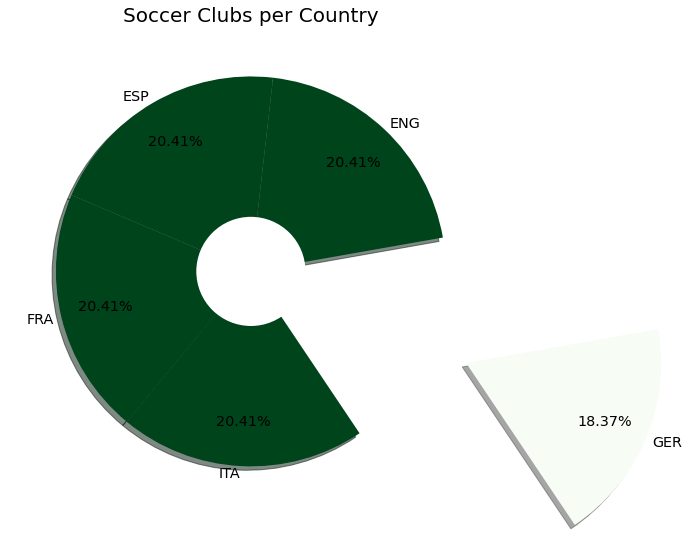

In [29]:
#ploting a pie chart

fig1, ax1 = plt.subplots(figsize=(10,12))

ax1.pie(y, explode=explode, labels=labels, autopct='%.2f%%',pctdistance=0.77,labeldistance=1.04,
        shadow=True, startangle=10, colors=colors,
       textprops={'size': 'x-large'})


ax1.set_title("Soccer Clubs per Country",fontsize=20)

#plt.legend(title = "Airlines:",labels=labels,loc="bets")


#draw inner circle
centre_circle = plt.Circle((0,0),.28,fc='white')

fig = plt.gcf()

fig.gca().add_artist(centre_circle)


plt.tight_layout()

#plt.savefig('Anual_flights_PieChart.png') #save it

plt.show()

In [30]:
# sample ['Attendance'].mean
df_sample['Attendance'].mean()

26181.05

In [31]:
#population ['Attendance'].mean
df['Attendance'].mean()

24239.85714285714

In [32]:
#CAlculate the mean of groupy categorical variables and one numerical variable
df_sample.groupby(by='Country')['Attendance'].apply(lambda x: x.mean())

Country
ENG    36263.000000
ESP    20402.333333
FRA    25349.400000
GER    24662.000000
ITA     6380.000000
Name: Attendance, dtype: float64

In [33]:
#CAlculate the mean of groupy categorical variables and one numerical variable
df_avg = df_sample.groupby('Country')['Attendance'].mean()
df_avg

Country
ENG    36263.000000
ESP    20402.333333
FRA    25349.400000
GER    24662.000000
ITA     6380.000000
Name: Attendance, dtype: float64

In [34]:
df_sample.groupby('Country')['Attendance'].mean()
#df_avg.columns = ['Country', 'Mean_Attendance']
df_avg

Country
ENG    36263.000000
ESP    20402.333333
FRA    25349.400000
GER    24662.000000
ITA     6380.000000
Name: Attendance, dtype: float64

No we are ready to determinate whether or not there is a statistically significant difference between the medians of the three selected  groups, in this case the ITA, ESP, GER Attenders values:

Interpretation

H0: The population median of all of the groups is not equal.

H1: The population median of all of the groups is equal.

#### Let crate the numpy lists that we will working on:

Let create the list for Italian Attendance values:

In [35]:
DataIta = pd.DataFrame(df_sample[df_sample.Country == 'ITA'])
DataIta


,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
77,78,Spezia,ITA,15,37,10,6,21,41,68,...,36,0.97,37.3,66.6,-29.3,-0.79,L L L L W,6380,Daniele Verde - 8,Ivan Provedel


In [36]:
AttendanceIta = DataIta['Attendance'].to_numpy()
AttendanceIta

array([6380])

Let create the list for Spanish Attendance values:

In [37]:
DataEsp = pd.DataFrame(df_sample[df_sample.Country == 'ESP'])
DataEsp

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
78,79,Mallorca,ESP,17,37,9,9,19,34,63,...,36,0.97,38.7,47.5,-8.9,-0.24,W L L D W,12712,Vedat Muriqi Salva Sevilla - 5,Manolo Reina
69,70,Elche,ESP,15,37,10,9,18,37,51,...,39,1.05,32.3,59.8,-27.5,-0.74,W D L L L,15546,Pere Milla - 8,Édgar Badía
37,38,Athletic Club,ESP,8,37,14,13,10,43,35,...,55,1.49,49.3,36.9,12.4,0.33,W W D L W,32949,Iñaki Williams - 8,Unai Simón


In [38]:
AttendanceEsp = DataEsp['Attendance'].to_numpy()
AttendanceEsp

array([12712, 15546, 32949])

Let create the list for German Attendance values:

In [39]:
DataGer = pd.DataFrame(df_sample[df_sample.Country == 'GER'])
DataGer

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
90,91,Arminia,GER,17,34,5,13,16,27,53,...,28,0.82,28.2,62.3,-34.1,-1.00,L L D L D,16773,Masaya Okugawa - 8,Stefan Ortega
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
25,26,Union Berlin,GER,5,34,16,9,9,50,44,...,57,1.68,50.5,41.6,8.8,0.26,W W D W W,14046,Taiwo Awoniyi - 15,Andreas Luthe
57,58,Bochum,GER,13,34,12,6,16,38,52,...,42,1.24,40.9,56.8,-15.9,-0.47,L L W W L,15125,Sebastian Polter - 10,Manuel Riemann
76,77,Stuttgart,GER,15,34,7,12,15,41,59,...,33,0.97,45.3,51.5,-6.3,-0.18,D L D D W,27052,Sasa Kalajdzic - 6,Florian Müller
8,9,Dortmund,GER,2,34,22,3,9,85,52,...,69,2.03,62.8,43.2,19.6,0.58,W L L W W,41800,Erling Haaland - 22,Gregor Kobel


In [40]:
AttendanceGer = DataGer['Attendance'].to_numpy()
AttendanceGer

array([16773, 33176, 14046, 15125, 27052, 41800])

In [41]:
#Kruskal test:
from scipy import stats
stats.kruskal(AttendanceIta, AttendanceEsp, AttendanceGer)



KruskalResult(statistic=2.9454545454545453, pvalue=0.2292992699996196)

Since this p-value is bigger than 0.05, so we can acept the null hypothesis that the median Attendance data is not the same for all three Countries.

Bibliografía:

- UnicodeDecodeError: 'utf-8' codec can't decode bytes in position https://stackoverflow.com/questions/55193168/unicodedecodeerror-utf-8-codec-cant-decode-bytes-in-position-0-1-invalid-co

- Statistical hypotesis tutorials: https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

- Kruskaltest: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
